In [1]:
from skimage.draw import circle_perimeter_aa
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

/u/v/a/vaishnavi_b/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


'cuda'

In [2]:
import utils
from torch.utils.data import DataLoader, TensorDataset
from timeit import default_timer as timer
from src.model import CNNModel
from src.train import test_step, train_step
from src.utils import calculate_accuracy, print_train_time

In [3]:
from prepare_data import generate_data, get_train_test_data


data = generate_data(noise_level=0.1, img_size=100, num_samples=30000)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Data loaded from ../data/noise_0.1_size_100_samples_30000.pkl


In [4]:
train_loader, test_loader = get_train_test_data(noise_level=0.1, img_size=100, num_samples=30000)

Data loaded from ../data/noise_0.1_size_100_samples_30000.pkl


/afs/cs.wisc.edu/u/v/a/vaishnavi_b/Desktop/Circle-Detection-ML-Challenge-/src/prepare_data.py:51: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  X_train = torch.tensor(train_images, dtype=torch.float32).unsqueeze(1)


DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7f85e0786770>, <torch.utils.data.dataloader.DataLoader object at 0x7f85e0786fb0>)
Length of train data loader: 750 batches of 32
Length of test data loader: 188 batches of 32


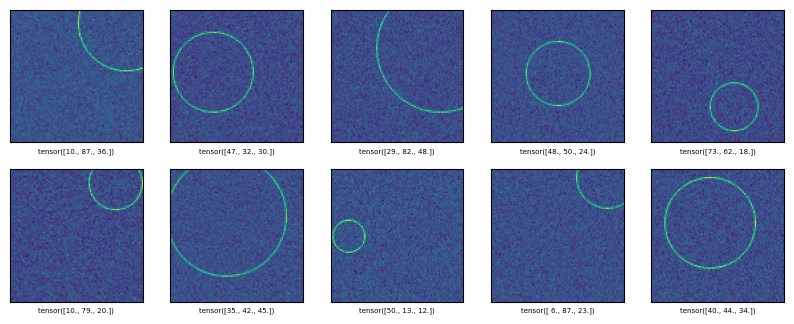

In [5]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    train_features_batch, train_labels_batch = next(iter(train_loader))
    plt.imshow(train_features_batch[i].squeeze())
    plt.xlabel(train_labels_batch[i], fontsize = 5)

In [8]:



model = CNNModel().to(device=device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 0.0001)

In [ ]:


torch.manual_seed(42)
start_time= timer()
print("Hi")
epochs = 2
train_losses = []
test_losses = []
test_accs = []
epochs_ = []

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    train_loss, train_acc = train_step(model = model,
               data_loader=train_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               calculate_accuracy=calculate_accuracy,
               device=device
               )

    test_loss, test_acc = test_step(model = model,
               data_loader=test_loader,
               loss_fn=loss_fn,
               calculate_accuracy=calculate_accuracy,
               device=device
               )

    epochs_.append(epoch)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(test_acc)





    # Calculate training time
    end_time = timer()
    total_train_time_model = print_train_time(start=start_time,
                                                end=end_time,
                                                device=str(next(model.parameters()).device))

In [7]:
len(train_loader)

750